In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [105]:
PLAYING_HOURS = 8
PLAYING_MINUTES = PLAYING_HOURS*60
INCOME_MULTIPLIER = 15
ROLLING_PRICE = 150
INCOME_PERIOD_MINUTES = 5

# could be full-table though (each item has each own distribution )

RARITY_DISTRIBUTION = [0.5, 0.25, 0.13, 0.07, 0.05]
CLASS_DISTRIBUTION = {"head": 0.2, "weapon": 0.1, "trinket": 0.35, "body": 0.15, "boots": 0.2}
QUALITY_MULTIPLIER = {"shitty": 0.6, "bad": 0.8, "normal": 1, "good": 1.2, "divine": 1.4}
QUALITY_DISTRIBUITION = {"shitty": 0.05, "bad": 0.2, "normal": 0.5, "good": 0.2, "divine": 0.05}

# health check
assert np.sum(RARITY_DISTRIBUTION) == 1
assert np.sum(list(CLASS_DISTRIBUTION.values())) == 1
assert np.sum(list(QUALITY_DISTRIBUITION.values())) == 1

POWER_DISTRIBUTION = {"head": [2, 6, 8, 10, 12],
                     "weapon": [8, 10, 12, 14, 16],
                     "trinket": [2,4, 6, 8, 10],
                     "body": [6, 8, 10, 12, 14],
                     "boots": [2, 6, 8, 10, 12]} 
character = {"head":0, "weapon": 0,"trinket": 0,"body": 0, "boots": 0} 

FINAL_TARGET = np.sum([i[-1] for i in list(POWER_DISTRIBUTION.values())])

INITIAL_BALANCE = 500
MINUTE_PER_STEP = 0.5

In [106]:
FINAL_TARGET

64

In [107]:
def null_character(character):
    for i in character:
        character[i] = 0

In [108]:
def roll(character):
    item = np.random.choice(list(CLASS_DISTRIBUTION.keys()), 1, p=list(CLASS_DISTRIBUTION.values()))[0]
    rarity = np.random.choice(np.arange(5), 1, p=RARITY_DISTRIBUTION)[0]
    quality = np.random.choice(list(QUALITY_DISTRIBUITION.keys()), 1, p=list(QUALITY_DISTRIBUITION.values()))[0]
    
    candidate = POWER_DISTRIBUTION[item][rarity] * QUALITY_MULTIPLIER[quality]
    if character[item] < candidate:
        character[item] = candidate

In [109]:
def return_power(character):
    return np.sum(list(character.values()))

In [110]:

def one_step(power_over_time, balance, current_time, time_waiting, time_not_improving):
    curr_power = return_power(character)
    if balance > ROLLING_PRICE:
        roll(character)
        if return_power(character) == curr_power:
            time_not_improving.append([current_time, return_power(character)])
        else:
            power_over_time.append([current_time, return_power(character)])
        balance -= ROLLING_PRICE
    else:
        time_waiting.append([current_time, return_power(character)])
        
   
    
    current_time += MINUTE_PER_STEP
    
    if current_time%INCOME_PERIOD_MINUTES==0:
        balance += INCOME_MULTIPLIER*return_power(character)
    return power_over_time, balance, current_time, time_waiting, time_not_improving

In [111]:
power_over_time, time_waiting, time_not_improving = [], [], []
balance = INITIAL_BALANCE
current_time = 0

null_character(character)
while current_time < PLAYING_MINUTES and return_power(character) < FINAL_TARGET:
    power_over_time, balance, current_time, time_waiting, time_not_improving = one_step(power_over_time, balance, current_time, time_waiting, time_not_improving)
power_over_time, time_waiting, time_not_improving = np.array(power_over_time), np.array(time_waiting), np.array(time_not_improving)

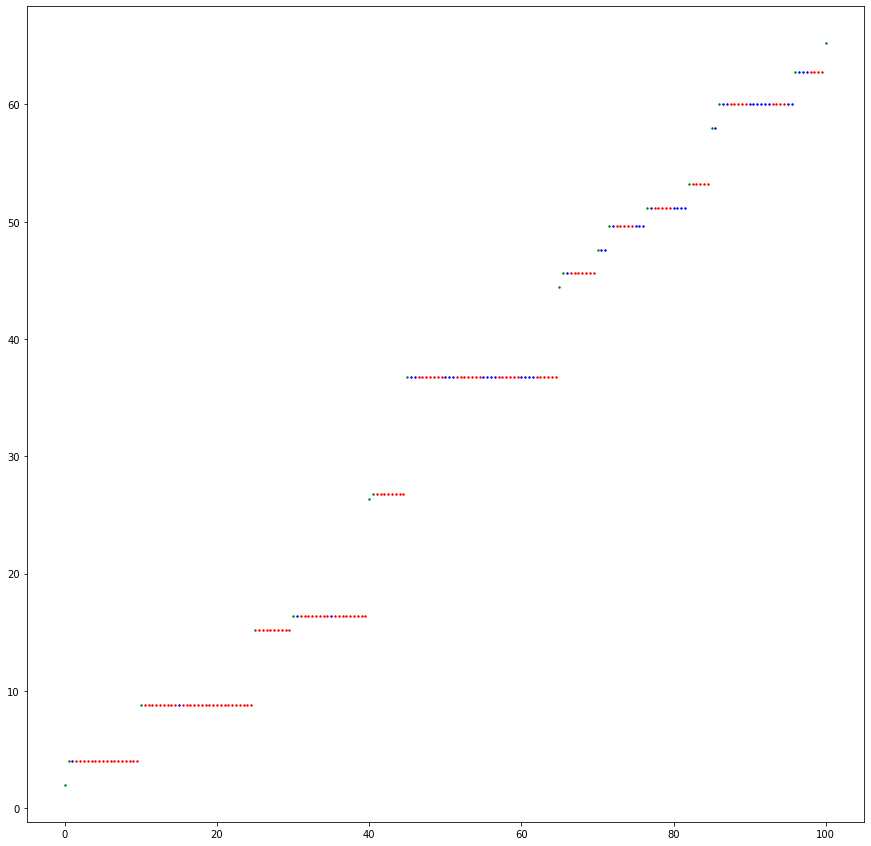

In [112]:
plt.figure(figsize=(15,15))
plt.scatter(time_waiting.T[0],time_waiting.T[1], c='r', s=2)
plt.scatter(time_not_improving.T[0],time_not_improving.T[1], c='b', s=2)
plt.scatter(power_over_time.T[0],power_over_time.T[1], c='g', s=2)

In [113]:
len(time_waiting), len(time_not_improving)

(140, 43)